## Shiller US Housing API (Yale Download)

In [2]:
options(warn=1)

library(readxl)
library(zoo)

temp <- paste0(tempfile(),".xls") # Has to match download extention
download.file("http://www.econ.yale.edu/~shiller/data/Fig3-1.xls", destfile = temp, mode="wb")
data <- read_excel(temp, sheet = 2, col_names = T)
unlink(temp)

# Collects column names
dataList <- list()
dataList <- unlist(lapply(1:ncol(data), function(x){
  dataList[[x]] <- paste(data[2:6,x], collapse=', ' )
}))   
dataList <- gsub("NA","", dataList)
dataList <- gsub(",","", dataList)      
dataList <- gsub("Monthly data from January 1953 for prices all other data are annual.","", dataList)
dataList <- gsub("From fig2.1Revised2011.xls","", dataList)
dataList <- trimws(dataList)

colnames(data) <- dataList
data <- data[7:nrow(data),] # Trims off names in top elements
data <- data[which(data[,1] != "<NA>"),] # trims off NAs in end years


options(warn = 0)
library(lubridate)
library(zoo)
data[,8] <- as.yearmon(format( date_decimal( as.numeric(data[,8]) ), "%m-%Y"), "%m-%Y")
# data[,8] <- as.yearmon(format( date_decimal( as.numeric(data[,8]) ), "%m-%Y"))


options(warn = 0)
data <- data[, -c(1,7,10,11,12,13,14,16,17,18,19)] 


head(data,5)
tail(data,5)

,Real Home Price Index,Date,Real Building Cost Index,U.S. Population Millions,Long Rate,Date.1,Nominal Home Price Index,Consumer Price Index
7,100,1890.000000,51.362340,63.056000,3.420000,Jan 1890,3.557296,7.611652
8,88,1891,47.266163,64.361000,3.620000,Jan 1891,3.209111,7.801942
9,95,1892,52.048155,65.666000,3.600000,Jan 1892,3.267142,7.326213
10,92,1893,44.673332,66.970000,3.750000,Jan 1893,3.406416,7.897091
11,123,1894,57.263434,68.275000,3.700000,Jan 1894,3.969316,6.850483


,Real Home Price Index,Date,Real Building Cost Index,U.S. Population Millions,Long Rate,Date.1,Nominal Home Price Index,Consumer Price Index
824,158,NA,NA,NA,NA,Jan 2015,175.406000,237.336000
825,158,NA,NA,NA,NA,Jan 2015,175.401000,236.525000
826,158,NA,NA,NA,NA,Jan 2016,175.375000,236.916000
827,158,NA,NA,NA,NA,Jan 2016,175.642000,237.111000
828,158,NA,NA,NA,NA,Jan 2016,176.913000,238.132000


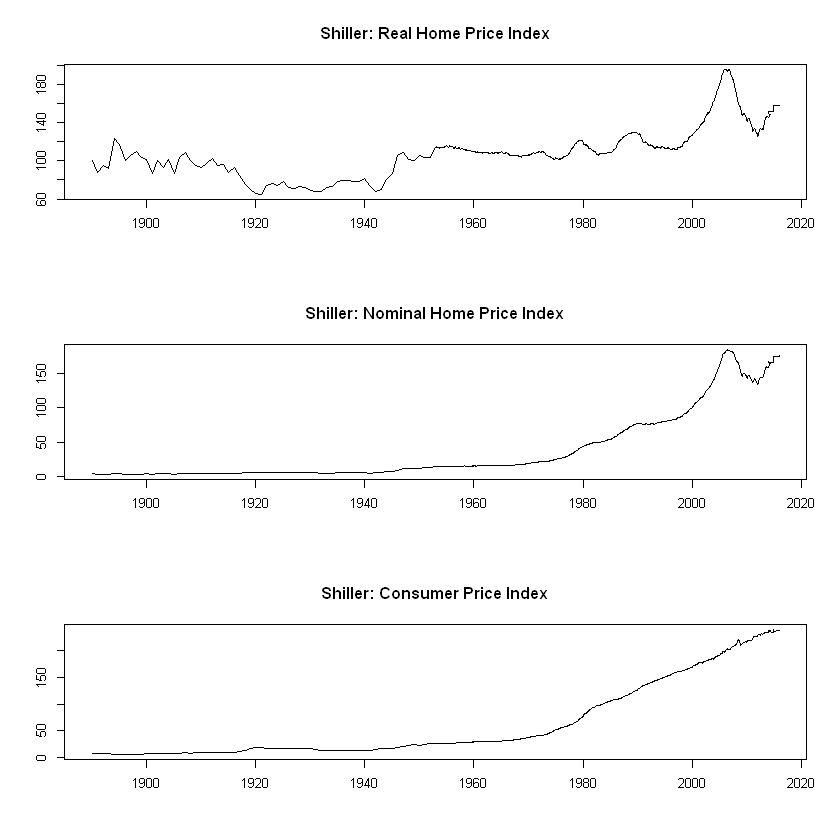

In [3]:
par(mfrow=c(3,1))
plot( data$Date.1, data$"Real Home Price Index" , type = "l",
      xlab = "", ylab = "", main = "Shiller: Real Home Price Index")
plot( data$Date.1, data$"Nominal Home Price Index"  , type = "l",
      xlab = "", ylab = "", main = "Shiller: Nominal Home Price Index")
plot( data$Date.1, data$"Consumer Price Index"  , type = "l",
      xlab = "", ylab = "", main = "Shiller: Consumer Price Index")

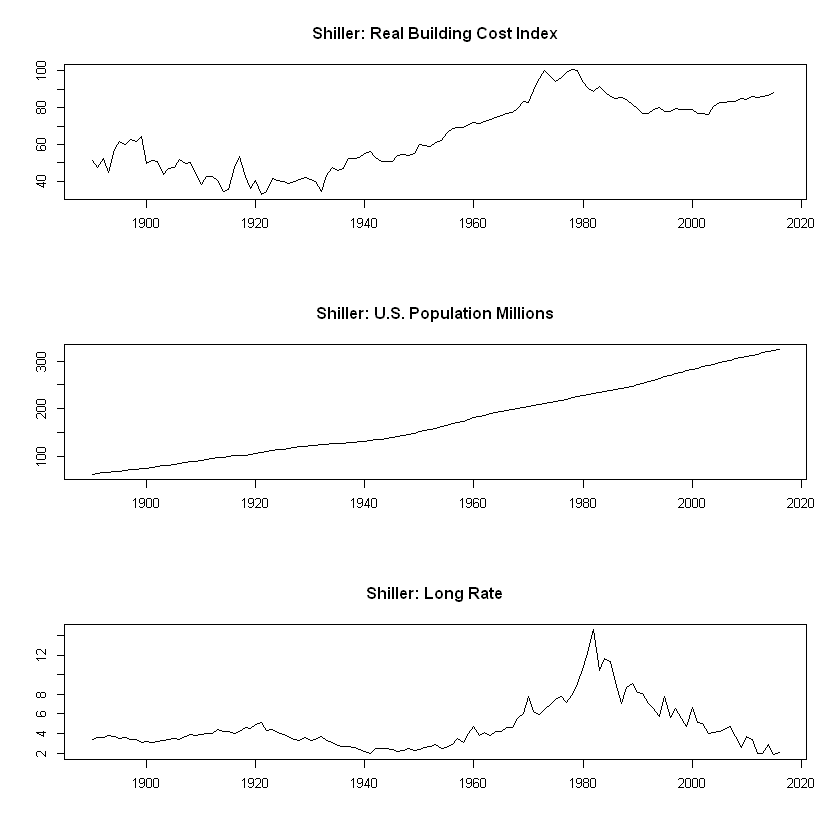

In [4]:
par(mfrow=c(3,1))
plot( data$Date, as.numeric(data$"Real Building Cost Index") , type = "l",
      xlab = "", ylab = "", main = "Shiller: Real Building Cost Index")
plot( data$Date, data$"U.S. Population Millions"  , type = "l",
      xlab = "", ylab = "", main = "Shiller: U.S. Population Millions")
plot( data$Date, data$"Long Rate"  , type = "l",
      xlab = "", ylab = "", main = "Shiller: Long Rate")